In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import os
import pandas as pd
import numpy as np
import requests
import csv
import timeit
import time
import json
import re
from scipy import stats
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline

## Introduction

This document contains the data wrangling process and analysis of data extracted from the twitter account [@dog_rates](https://twitter.com/dog_rates?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor).

On the first part of the document the data is gathered using different techniques, such as downloading files programmatically  or requesting the data through *tweepy* API. 

Then the data was assessed, and the quality and tidiness issues identified were tackled in the following section, cleaning data.

After the wrangling process, a comprehensive source of information was obtained, which was used to analyze the data and gain insight about it. Such analysis is provided in the last part of the document, which also contains conclusions about the data


## Sections


<div class="toc">
  <ul>
    <li><a href='#gathering'>Gathering Data</a></li>
      <li><a href='#assesing'>Assesing Data</a></li>
      <li><a href='#cleaning'>Cleaning Data</a></li>
      <li><a href='#store'>Storing Data</a></li>
      <li><a href='#analysis'>Analyzing Data</a></li>
  <ul>
        <li><a href='#ish1'>Insight 1</a></li>
      <li><a href='#ish2'>Insight 2</a></li>
      <li><a href='#ish3'>Insight 3</a></li>
      </ul>
  </ul>
</div>


<a id='gathering'></a>

## Gathering Data

#### 1. Using existing file

Out of the 5000+ tweets from WeRateDogs Twitter archive, a selection of 2356 has been made to create a file. In such a file, the tweet´s text has  been used to extract further variables about the tweet, such as the rating, dog name or dog "stage" (i.e. doggo, floofer, pupper, and puppo). That file is provided and available in the local directory.

In [3]:
df1 = pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv")

In [8]:
df1.iloc[0].text

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

#### 2. Downloading a file programmatically

A neural network has been used to classify breeds of dogs  from each image in the WeRateDogs Twitter archive. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images). Such file is stored on Udacity´s servers and is downloaded programmatically as follows:

    1. Accessing the corresponding URL on Udacity´s servers:

In [5]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

    2. Then the http request is sent using requests library

In [6]:
r = requests.get(url)

    3. The file is saved locally as follows

In [6]:
with open("image-predictions.tsv",'wb') as f:
    f.write(r.content)

In [7]:
df2 = pd.read_csv("image-predictions.tsv", sep="\t")

df2.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


#### 3. Using Tweepy API

In [8]:
import tweepy

In [9]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit_notify = True, wait_on_rate_limit=True)

* Test if the connection is working

In [10]:
api.me().name

'Antonio'

* Using the tweepy API, the the intial data frame (df1) is going to be provided with retweet counts and favourite count. Thus, only the tweets ids available on df1 are going to be extracted. The list with the corresponding ids is created as follows:

In [11]:
tweet_ids = list(df1.tweet_id)

In [12]:
api.rate_limit_status()['resources']['statuses']['/statuses/lookup']

{'limit': 900, 'remaining': 900, 'reset': 1524655676}

* The corresponding files are exttracted using statuses_lookup method from tweety API and saved locally as dogsRate.txt

In [ ]:
with open("tweepyAPI.tx", "w") as f:
    start = timeit.timeit()
    for i in tweet_ids:
        try:
            status= api.statuses_lookup([i])
            if(len(status)>0):
                json.dump(status[0]._json, f)
                f.write('\n')
        except tweepy.TweepError:
            time.sleep(60*15)
            continue
        except StopIteration:
            break
end = timeit.timeit()
print(start - end)

* The file dogsRate.txt is extracted and transformed into a list of dictionaries (JSON objects)

In [13]:
list_dict = []
with open("tweepyAPI.txt", "r") as f:
    for i in f.readlines():
        if(len(i)>1):
            trmd = json.loads(i, encoding='utf-8')          
            list_dict.append({'id':trmd['id'], 
                              'created_at':trmd['created_at'],
                              'favorite_count':trmd['favorite_count'],
                              'retweeted':trmd['retweeted'],
                              'retweet_count':trmd['retweet_count'],
                               'text': trmd['text'],
                                'source': trmd['source']})
            try:
                list_dict[-1]['expanded_url'] = trmd['entities']['media'][0]['expanded_url']
            except KeyError:
                if(len(trmd['entities']['urls'])>0):
                    list_dict[-1]['expanded_url'] = trmd['entities']['urls'][0]['expanded_url']

* The list of dictionaries is transformed into a data frame with the following columns: id, created_at, favorite_count, retweeted, retweet_count.

In [14]:
df3 = pd.DataFrame(list_dict, columns=["id", "created_at", "favorite_count", "retweeted", "retweet_count", "text", "source", "expanded_url"])
df3.head()

,id,created_at,favorite_count,retweeted,retweet_count,text,source,expanded_url
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,38950,False,8631,This is Phineas. He's a mystical boy. Only eve...,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,33346,False,6341,This is Tilly. She's just checking pup on you....,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/i/web/status/8921774213063...
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,25120,False,4207,This is Archie. He is a rare Norwegian Pouncin...,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/i/web/status/8918151813780...
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,42290,False,8755,This is Darla. She commenced a snooze mid meal...,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,40454,False,9512,This is Franklin. He would like you to stop ca...,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/i/web/status/8913275589266...


<a id='assesing'></a>

## Assesing Data

On this section the gathered data is inspected. The inspection is carried out in the following order:
1. Missing values
2. Tidiness Issues
3. Quality Issues

The identified issues are solved in the following section, *Cleaning*. 

### 1. Missing values

**Data frame 1 (df1)**

In [16]:
df1.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

* Seems like there are 59 expanded_urls missing
* There is no information about retweets count and favourite counts.
* Columns doggo, floofer, pupper and puppo are filled with "None" value

**Data frame 2 (df2)**

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


* No missing values identified in this data frame

**Data frame 3 (df3)**

In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 8 columns):
id                2345 non-null int64
created_at        2345 non-null object
favorite_count    2345 non-null int64
retweeted         2345 non-null bool
retweet_count     2345 non-null int64
text              2345 non-null object
source            2345 non-null object
expanded_url      2208 non-null object
dtypes: bool(1), int64(3), object(4)
memory usage: 130.6+ KB


* There are 137 missing expanded_url values
    

### 2. Tidiness Issues

**Data frame 1 (df1)**

***Issue 1***

In [20]:
df1.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


* Following the tidiness best practices, each variable must form a column. The dog_stage variable is spread in four columns (doggo, floofer, pupper and puppo). That four columns must be replaced with a single column called dog_stage.

**Data frame 2 (df2)**

***Issue 2***

In [21]:
df2.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


* Out of the information coming from the neural network, only the prediction of the dog is considered relevant. Instead of having the predctions spread in three columns, one column with all dog prediction *(px_dog== True)* is going to be created.

**Data frame 3 (df3)**

In [22]:
df3.sample(5)

,id,created_at,favorite_count,retweeted,retweet_count,text,source,expanded_url
1792,676948236477857792,Wed Dec 16 02:13:31 +0000 2015,2304,False,956,This is Karl. Karl thinks he's slick. 6/10 sne...,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/676948236...
1007,746818907684614144,Sat Jun 25 21:34:37 +0000 2016,5707,False,1897,Guys... Dog Jesus 2.0\n13/10 buoyant af https:...,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/746818907...
668,789268448748703744,Fri Oct 21 00:53:56 +0000 2016,10020,False,2936,This is Stella. She's happier than I will ever...,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/789268448...
826,767754930266464257,Mon Aug 22 16:06:54 +0000 2016,17474,False,6052,This is Philbert. His toilet broke and he does...,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/767754930...
1361,702217446468493312,Tue Feb 23 19:44:20 +0000 2016,5169,False,1477,"I know it's tempting, but please stop sending ...","<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/702217446...


* No tidiness issues found

**General**

***Issue 3***

* The information available is spread in three sources (df1, df2, df3). Given that each instance from each data frame contains information about a single tweet, it would make sense to gather the data into a single data frame. In oder words, each observational unit forms a single table.

### 3. Quality Issues

### Data frame 1 (df1)

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

***Issue 1***

There are multiple dog stages for the same instance (dog)

In [24]:
df1.query("doggo != 'None'&( pupper!= 'None')")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


Pupper or other

In [25]:
df1.query("pupper != 'None' &(doggo != 'None'|puppo != 'None'|floofer != 'None')").text[1113]

'Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda'

index 460, 575, : Pupper

Index 705: Doggo

index 531, 565, 733, 778, 822, 889, 1063, 1113: There are two dogs pupper and doggo with a rating each

Index 956: None


Floofer or other

In [26]:
df1.query("floofer != 'None' &(doggo != 'None'|floofer != 'None'|pupper != 'None')").text[200]

"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"

Index 200: Floofer

Puppo or other

In [27]:
df1.query("puppo != 'None' &(doggo != 'None'|floofer != 'None'|pupper != 'None')").text[191]

"Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"

Index 191: Puppo

***Issue 2***

In [28]:
df1.loc[[9]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [29]:
df1.loc[9].text

'This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A'

* The data about the dog stage is inaccurate. The column doggo says it is a doggo however on the text it is clearly specified that it is a pup (assuming it means pupper).

***Issue 3***

In [30]:
type(df1.timestamp[0])

str

* Time stamp is in string format, to handle dates it is more convenient to have it as *datetime* data type

***Issue 4***

* *"a"*, *"an"*, and *"such"* do not sound like dog names. There are 55 dogs called *"a"*, lets look more in depth into instances with such characteristics.

Dogs called *"a"*

In [31]:
df1[df1.name=="a"].text[[56,  649,  801, 1002, 1004, 1017, 1049, 1193, 1207, 1340, 1351,
            1361, 1368, 1382]]

56      Here is a pupper approaching maximum borkdrive...
649     Here is a perfect example of someone who has t...
801     Guys this is getting so out of hand. We only r...
1002    This is a mighty rare blue-tailed hammer sherk...
1004    Viewer discretion is advised. This is a terrib...
1017    This is a carrot. We only rate dogs. Please on...
1049    This is a very rare Great Alaskan Bush Pupper....
1193    People please. This is a Deadly Mediterranean ...
1207    This is a taco. We only rate dogs. Please only...
1340    Here is a heartbreaking scene of an incredible...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1361    This is a Butternut Cumberfloof. It's not wind...
1368    This is a Wild Tuscan Poofwiggle. Careful not ...
1382    "Pupper is a present to world. Here is a bow f...
Name: text, dtype: object

Seems that any string after:
    
    -Here is
    -This is
    
Has been saved as the name of the dog

Dogs called *"an"*

In [32]:
df1[df1.name=="an"].text

759     RT @dog_rates: This is an East African Chalupa...
1025    This is an Iraqi Speed Kangaroo. It is not a d...
1362    This is an East African Chalupa Seal. We only ...
2204    This is an Irish Rigatoni terrier named Berta....
2333    This is an extremely rare horned Parthenon. No...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
2349    This is an odd dog. Hard on the outside but lo...
Name: text, dtype: object

Same issue as wiht dogs called *"a"*

Dogs called *"such"*

In [33]:
df1[df1.name=="such"].text[22]

"I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba"

Other names that are wrong: *"the"*, *"quite"*, *"O"*, *"light"*

The majority of names identified to this point that are wrong start with a lowercase letter. Thus, names that start with a lower case are serched within the data frame:

In [34]:
df1[df1.name.str.get(0).str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
quite            4
just             4
one              4
actually         2
getting          2
mad              2
not              2
such             1
life             1
infuriating      1
light            1
this             1
his              1
by               1
my               1
officially       1
old              1
space            1
unacceptable     1
incredibly       1
all              1
Name: name, dtype: int64

* None of them seems to be dog names. However, it would be rather cool having a dog called "Unacceptable".

***Issue 5***

In [35]:
df1.loc[1662].text

'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5'

In [36]:
(df1.rating_numerator[1662], df1.rating_denominator[1662])

(7, 11)

* The rating for the following dog is not right. 7/11 refers to the store, the actual rating is 10/10.

***Issue 6***

The custom rating system seems to be quite random, however some values are suspicious. 0 as denominator for example.

In [37]:
df1[df1.rating_denominator==0].text

313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object

In [38]:
df1.loc[313].text

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

* The rating for instance with index=313  seems to be 13/10 instead of 960/00

***Issue 7***

A numerator of 0 or 1 seems unlikely, given the weRateDogs account is rather generous with the ratings. lets inspect the following cases:

In [39]:
df1[df1.rating_numerator==1].text

605     RT @dog_rates: Not familiar with this breed. N...
1446    After reading the comments I may have overesti...
1869    What kind of person sends in a picture without...
1940    The millennials have spoken and we've decided ...
2038    After 22 minutes of careful deliberation this ...
2091    Flamboyant pup here. Probably poisonous. Won't...
2261    Never seen dog like this. Breathes heavy. Tilt...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
2338    Not familiar with this breed. No tail (weird)....
Name: text, dtype: object

In [40]:
df1.text[2335]

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

* The rating for instance with index=2335 is wrong. The actual rating is 9/10. 

***Issue 8***

Looking for rating that are likely to be a missmatch. 24/7 for example.

In [41]:
df1.query("rating_numerator==24 & rating_denominator ==7")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [42]:
df1.text[516]

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

* The rating for instance with index=516 is wrong. There is no rating. 

***Issue 9***

In [43]:
type(df1.doggo[0]), type(df1.pupper[0]),  type(df1.puppo[0]),  type(df1.floofer[0])

(str, str, str, str)

* The format for dog stage is given in strings, given that there are only four categories of dog stages, it would be more appropiate to have this varaible as *category* data type

### Data frame 2 (df2)

In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [45]:
df2.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


***Issue 1***

* The data on column *breed* is a string data type. As it is a categorical value, it is better to have it as a category data type.

### Data frame 3 (df3)

In [46]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 8 columns):
id                2345 non-null int64
created_at        2345 non-null object
favorite_count    2345 non-null int64
retweeted         2345 non-null bool
retweet_count     2345 non-null int64
text              2345 non-null object
source            2345 non-null object
expanded_url      2208 non-null object
dtypes: bool(1), int64(3), object(4)
memory usage: 130.6+ KB


***Issue 1***

* created_at is a string data type, to handle dates it is more convenient to have it as *datetime* data type

<a id='cleaning'></a>

## Cleaning Data

The aim of this Data wrangling process is to create a single data frame with all the gathered information.
To create such data frame, df1 is going to be used as baseline and is going to be combined with the information proceeding from the neural network file and the info obtained using *tweepy* API.

Then, the corresponding 

In [47]:
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

### 1.Missing values

**Data frame 1 (df1)**

Fill the 59 missing expanded_urls.

In [48]:
a = list(df1[df1.expanded_urls.isnull()].tweet_id.index)

In [49]:
df1.loc[a]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


Seems that most of these tweets are a reply to other tweets, thus there is no image attached to them

In [50]:
#in_reply_to_status_id not null                  #in_reply_to_status_id is null
sum(df1.loc[a].in_reply_to_status_id.notnull()), sum(df1.loc[a].in_reply_to_status_id.isnull())

(55, 4)

Out of the 59 tweets having no expanded urls, 54 are a reply to other tweets which are likely to have the dog's image..

Inpecting the 4 instances that are not replies:

In [51]:
df1.loc[a][df1.loc[a].in_reply_to_status_id.isnull()].text

185     RT @Jenna_Marbles: @dog_rates Thanks for ratin...
375     Beebop and Doobert should start a band 12/10 w...
707        Today, 10/10, should be National Dog Rates Day
1445      Oh my god 10/10 for every little hot dog pupper
Name: text, dtype: object

There is 1 RT and 3 tweets that do not refer to any specific dog

**Searching the missing names and images urls**

In [52]:
c= list(df1.loc[a].in_reply_to_status_id.values)

In [53]:
search_ids =[]
for i in c:
    try:
        search_ids.append(int(i))
    except ValueError:
        print(i)

nan
nan
nan
nan


In [54]:
api.statuses_lookup([search_ids])

[]

Unfortunately no information was found out of these status ids.

**Data frame 3 (df3)**

There are 137 expanded_urls missing

In [55]:
missingURL_id =list(df3[df3.expanded_url.isnull()].index)
len(missingURL_id)

137

Out of these 137 tweets, how many of them start with RT:

In [56]:
sum(df3[df3.expanded_url.isnull()].text.str[:2].values=="RT")

80

In [57]:
rt_ids = list(df3[df3.expanded_url.isnull()][df3[df3.expanded_url.isnull()].text.str[:2].values=="RT"].index)

Seems like 80 of the are retweets. The corresponding ids are removed from missingURL_id list.

In [58]:
for i in rt_ids:
    missingURL_id.remove(i)

Out of these remaining tweets, how many of them start with @:

In [59]:
sum(df3[df3.expanded_url.isnull()].loc[missingURL_id].text.str[:1].values=="@")

22

In [60]:
replies_ids = list(df3.loc[missingURL_id][df3[df3.expanded_url.isnull()].loc[missingURL_id].text.str[:1].values=="@"].index)

22 are replies. The corresponding ids are removed from missingURL_id list.

In [61]:
for i in replies_ids:
    missingURL_id.remove(i)

In [62]:
len(list(df3.loc[missingURL_id].id.values))

35

Using the tweet ids, the 35 tweets left over are inspected using the initial data frame (df1)

In [63]:
sum(df1[df1['tweet_id'].isin(list(df3.loc[missingURL_id].id.values))].in_reply_to_status_id.isnull())

3

All but three are replies. The remaining tweets are general tweets that do not refer to any specific dog. The results obtained from both sources are coherent. 

The missing values inspected so far have been justified.

### 2. Tidiness Issues

#### Issue 1
##### Define

* The dog_stage variable is spread in four columns (doggo, floofer, pupper and puppo). That four columns must be replaced with a single column called dog_stage.

##### Code

In [64]:
df1_clean.doggo.fillna(value ="None",  inplace=True)

The new column containgin the information about the dogs is going to be created using the following function:

In [65]:
def melt_cols(row):
    if(row['doggo'] !="None"):
            return (row['doggo'])
    elif(row['pupper'] !="None"):
            return (row['pupper'])
    elif(row['floofer'] !="None"):
            return (row['floofer'])
    elif(row['puppo'] !="None"):
            return (row['puppo'])
    return("None")
    

In [66]:
len(df1_clean[["doggo", "floofer", "pupper", "puppo"]].apply(melt_cols, axis=1))

2356

In [67]:
(df1_clean[["doggo", "floofer", "pupper", "puppo"]].apply(melt_cols, axis=1).value_counts())

None       1976
pupper      245
doggo        97
puppo        29
floofer       9
dtype: int64

In [68]:
df1_clean['dog_stage'] = df1_clean[["doggo", "floofer", "pupper", "puppo"]].apply(melt_cols, axis=1)

In [69]:
df1_clean.drop(["doggo", "floofer", "pupper", "puppo"], axis = 1, inplace=True)

Comparing to the original data frame seems that some values about the dog stage overlap:

In [70]:
print("puppo: ",df1.puppo.value_counts()[1],   "pupper: ",df1.pupper.value_counts()[1],"doggo: ",df1.doggo.value_counts()[1],"floofer: ",df1.floofer.value_counts()[1])

puppo:  30 pupper:  257 doggo:  97 floofer:  10


There are 12 less puppers in the new data frame than in the orginal one. Having dog stages overlaped is a quality issue and it would be tackled in the following section (***Issue 1***).

##### Test

In [71]:
len(df1)

2356

In [72]:
len(df1_clean)

2356

In [73]:
print("puppo: ",df1.puppo.value_counts()[1],   "pupper: ",df1.pupper.value_counts()[1],"doggo: ",df1.doggo.value_counts()[1],"floofer: ",df1.floofer.value_counts()[1])

puppo:  30 pupper:  257 doggo:  97 floofer:  10


In [74]:
df1_clean.dog_stage.value_counts()

None       1976
pupper      245
doggo        97
puppo        29
floofer       9
Name: dog_stage, dtype: int64

#### Issue 2
##### Define

* Out of the information coming from the neural network, only the prediction of the dog is considered relevant. Instead of having the predctions spread in three columns, one column with all dog prediction *(px_dog== True)* is going to be created.

##### Code

#### Prediction 1 values

In [75]:
rplc_idx = list(df2_clean[df2_clean.p1_dog== True].p1.index)

In [76]:
rplc_values = df2_clean[df2_clean.p1_dog== True].p1

In [77]:
for i in rplc_idx:
    df2_clean.loc[[i], "breed"] = rplc_values[i]

#### Prediciton 2 values

In [78]:
rplc_idx = list(df2_clean.query("p1_dog==False & p2_dog == True").p2.index)

In [79]:
rplc_values = df2_clean.query("p1_dog==False & p2_dog == True").p2

In [80]:
for i in rplc_idx:
    df2_clean.loc[[i], "breed"] = rplc_values[i]

#### Prediction 3 values

In [81]:
rplc_idx = list(df2_clean.query("p1_dog==False&p2_dog==False & p3_dog == True").p3.index)

In [82]:
rplc_values = df2_clean.query("p1_dog==False&p2_dog==False & p3_dog == True").p3

In [83]:
for i in rplc_idx:
    df2_clean.loc[[i], "breed"] = rplc_values[i]

In [84]:
(df2_clean.breed.isnull()).value_counts()

False    1751
True      324
Name: breed, dtype: int64

##### Test

In [85]:
df2_clean[["p1", "p2", "p3", "breed"]].sample(6)

,p1,p2,p3,breed
584,Labrador_retriever,Chesapeake_Bay_retriever,golden_retriever,Labrador_retriever
795,geyser,seashore,beacon,NaN
143,crash_helmet,toaster,mouse,NaN
1747,cowboy_boot,Chihuahua,papillon,Chihuahua
1322,geyser,volcano,fountain,NaN
2021,street_sign,umbrella,traffic_light,NaN


#### Issue 3
##### Define

* The information available is spread in three sources (df1, df2, df3). Given that each instance from each data frame contains information about a single tweet, it would make sense to gather the data into a single data frame. In oder words, each observational unit forms a single table.

    In order to gather all data into a single dataframe, the function merge is going to be used
    
    The process will be done as follows:
    1. Merge retweet count and favourite count from df3
    2. Merge data about images from df2
    

##### Code

    1. Merge retweet count and favourite count from df3

In [86]:
df3_clean.rename(columns={"id": "tweet_id"}, inplace=True)

In [87]:
df1_clean = pd.merge(df1_clean, df3_clean[["tweet_id", "favorite_count", "retweet_count"]], on="tweet_id", how='left')

    2. Merge data about breed from df2

In [88]:
df2_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher


In [89]:
df1_clean = pd.merge(df1_clean, df2_clean[['tweet_id', 'breed']], on="tweet_id", how='left')

##### Test

    1. Merge retweet count and favourite count from df3

In [90]:
df3_clean[['favorite_count', 'retweet_count']].describe()

,favorite_count,retweet_count
count,2345.000000,2345.000000
mean,8094.572281,3039.288699
std,12176.263776,5053.732679
min,0.000000,0.000000
25%,1407.000000,608.000000
50%,3549.000000,1423.000000
75%,10009.000000,3541.000000
max,143884.000000,77675.000000


In [91]:
df1_clean[['favorite_count', 'retweet_count']].describe()

,favorite_count,retweet_count
count,2345.000000,2345.000000
mean,8094.572281,3039.288699
std,12176.263776,5053.732679
min,0.000000,0.000000
25%,1407.000000,608.000000
50%,3549.000000,1423.000000
75%,10009.000000,3541.000000
max,143884.000000,77675.000000


    2. Merge data about images from df2

In [92]:
sample_test = list(df1_clean.sample(3).index)

In [93]:
df1_clean.loc[sample_test]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,breed
1996,672591762242805761,NaN,NaN,2015-12-04 01:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Taz. He boxes leaves. 10/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672591762...,10,10,Taz,None,988.0,354.0,kuvasz
410,823322678127919110,NaN,NaN,2017-01-23 00:13:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. He's got the fastest paws in th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/823322678...,11,10,Wyatt,None,17119.0,4523.0,Chihuahua
731,781655249211752448,NaN,NaN,2016-09-30 00:41:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Combo. The daily struggles of being a ...,NaN,NaN,NaN,https://vine.co/v/5rt6T3qm7hL,11,10,Combo,doggo,4383.0,1258.0,NaN


In [94]:
df2_clean[df2_clean.tweet_id.isin(list(df1_clean.loc[sample_test].tweet_id.values))]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
354,672591762242805761,https://pbs.twimg.com/media/CVWGotpXAAMRfGq.jpg,1,kuvasz,0.777659,True,Great_Pyrenees,0.112517,True,golden_retriever,0.038351,True,kuvasz
1747,823322678127919110,https://pbs.twimg.com/media/C20HmaKWgAQ6-6X.jpg,2,cowboy_boot,0.990253,False,Chihuahua,0.001836,True,papillon,0.001274,True,Chihuahua


### 3. Quality Issues

### Data frame 1 (df1)

#### Issue 1

##### Define

Make the following changes on the data frame:
* index 460, 575, : Pupper

* Index 705: Doggo

* index 531, 565, 733, 778, 822, 889, 1063, 1113: There are two dogs pupper and doggo with a rating each. In this case the instance will be duplicated, creating a new line for each dog with the corresponding information for each

* Index 956: None

* Index 200: Floofer

* Index 191: Puppo

##### Code

index 460, 575, : Pupper

In [95]:
df1_clean.loc[[460, 575], "dog_stage"] = "pupper"

##### Test

In [96]:
df1_clean.loc[[460, 575], "dog_stage"]

460    pupper
575    pupper
Name: dog_stage, dtype: object

##### Code

Index 705: Doggo

In [97]:
df1_clean.loc[705, "dog_stage"] = "doggo"

##### Test

In [98]:
df1_clean.loc[705, "dog_stage"]

'doggo'

##### Code

* Index 531

In [99]:
idx = 531

In [100]:
df1[df1.index == 531].text.values

array([ 'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho'], dtype=object)

In [101]:
df1_clean= (df1_clean.append(df1_clean[df1_clean.index == 531], ignore_index=True))

In [102]:
df1_clean[df1_clean.tweet_id== 808106460588765185]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,breed
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,9550.0,2464.0,golden_retriever
2356,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,9550.0,2464.0,golden_retriever


In [103]:
df1_clean.loc[531, 'dog_stage']  = "pupper"
df1_clean.loc[531, 'name']  = "Burke"
df1_clean.loc[531, 'rating_numerator']  = 12
df1_clean.loc[531, 'rating_denominator']  = 10

In [104]:
df1_clean.loc[2356, 'dog_stage']  = "doggo"
df1_clean.loc[2356, 'name']  = "Dexter"
df1_clean.loc[2356, 'rating_numerator']  = 12
df1_clean.loc[2356, 'rating_denominator']  = 10

##### Test

In [105]:
print("test: ", idx)

test:  531


In [106]:
df1_clean[df1_clean.tweet_id== 808106460588765185]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,breed
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,Burke,pupper,9550.0,2464.0,golden_retriever
2356,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,Dexter,doggo,9550.0,2464.0,golden_retriever


##### Code

* Index 565

In [107]:
idx = 565

In [108]:
df1[df1.index == idx].text[idx]

'Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze'

In [109]:
df1_clean= (df1_clean.append(df1_clean[df1_clean.index == idx], ignore_index=True))

In [110]:
twt_id = df1[df1.index == idx].tweet_id[idx]

In [111]:
df1_clean[df1_clean.tweet_id== twt_id]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,breed
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,6948.0,1540.0,Labrador_retriever
2357,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,6948.0,1540.0,Labrador_retriever


In [112]:
df1_clean.loc[idx, 'dog_stage']  = "pupper"
df1_clean.loc[idx, 'name']  = "None"
df1_clean.loc[idx, 'rating_numerator']  = 11
df1_clean.loc[idx, 'rating_denominator']  = 10

In [113]:
df1_clean.loc[2356, 'dog_stage']  = "doggo"
df1_clean.loc[2356, 'name']  = "None"
df1_clean.loc[2356, 'rating_numerator']  = 11
df1_clean.loc[2356, 'rating_denominator']  = 10

##### Test

In [114]:
print("test: ", idx)

test:  565


In [115]:
df1_clean[df1_clean.tweet_id== twt_id]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,breed
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,pupper,6948.0,1540.0,Labrador_retriever
2357,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,6948.0,1540.0,Labrador_retriever


##### Code

* Index 733

In [116]:
idx = 733

In [117]:
df1[df1.index == idx].text[idx]

'Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u'

In [118]:
df1_clean= (df1_clean.append(df1_clean[df1_clean.index == idx], ignore_index=True))

In [119]:
twt_id = df1[df1.index == idx].tweet_id[idx]

In [120]:
df1_clean[df1_clean.tweet_id== twt_id]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,breed
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,7807.0,2873.0,NaN
2358,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,7807.0,2873.0,NaN


In [121]:
df1_clean.loc[idx, 'dog_stage']  = "pupper"
df1_clean.loc[idx, 'name']  = "None"
df1_clean.loc[idx, 'rating_numerator']  = 12
df1_clean.loc[idx, 'rating_denominator']  = 10

In [122]:
df1_clean.loc[2356, 'dog_stage']  = "doggo"
df1_clean.loc[2356, 'name']  = "None"
df1_clean.loc[2356, 'rating_numerator']  = 12
df1_clean.loc[2356, 'rating_denominator']  = 10

##### Test

In [123]:
print("test: ", idx)

test:  733


In [124]:
df1_clean[df1_clean.tweet_id== twt_id]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,breed
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,pupper,7807.0,2873.0,NaN
2358,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,7807.0,2873.0,NaN


##### Code

* Index 778

In [125]:
idx = 778

In [126]:
df1[df1.index == idx].text[idx]

'RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda'

In [127]:
df1_clean= (df1_clean.append(df1_clean[df1_clean.index == idx], ignore_index=True))

In [128]:
twt_id = df1[df1.index == idx].tweet_id[idx]

In [129]:
df1_clean[df1_clean.tweet_id== twt_id]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,breed
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,0.0,17415.0,golden_retriever
2359,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,0.0,17415.0,golden_retriever


In [130]:
df1_clean.loc[idx, 'dog_stage']  = "pupper"
df1_clean.loc[idx, 'name']  = "None"
df1_clean.loc[idx, 'rating_numerator']  = 12
df1_clean.loc[idx, 'rating_denominator']  = 10

In [131]:
df1_clean.loc[2356, 'dog_stage']  = "doggo"
df1_clean.loc[2356, 'name']  = "None"
df1_clean.loc[2356, 'rating_numerator']  = 12
df1_clean.loc[2356, 'rating_denominator']  = 10

##### Test

In [132]:
print("test: ", idx)

test:  778


In [133]:
df1_clean[df1_clean.tweet_id== twt_id]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,breed
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,pupper,0.0,17415.0,golden_retriever
2359,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,0.0,17415.0,golden_retriever


##### Code

* Index 822

In [134]:
idx = 822

In [135]:
df1[df1.index == idx].text[idx]

'RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC'

In [136]:
df1_clean= (df1_clean.append(df1_clean[df1_clean.index == idx], ignore_index=True))

In [137]:
twt_id = df1[df1.index == idx].tweet_id[idx]

In [138]:
df1_clean[df1_clean.tweet_id== twt_id]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,breed
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,0.0,3417.0,golden_retriever
2360,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,0.0,3417.0,golden_retriever


In [139]:
df1_clean.loc[idx, 'dog_stage']  = "pupper"
df1_clean.loc[idx, 'name']  = "None"
df1_clean.loc[idx, 'rating_numerator']  = 12
df1_clean.loc[idx, 'rating_denominator']  = 10

In [140]:
df1_clean.loc[2356, 'dog_stage']  = "doggo"
df1_clean.loc[2356, 'name']  = "None"
df1_clean.loc[2356, 'rating_numerator']  = 12
df1_clean.loc[2356, 'rating_denominator']  = 10

##### Test

In [141]:
print("test: ", idx)

test:  822


In [142]:
df1_clean[df1_clean.tweet_id== twt_id]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,breed
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,None,pupper,0.0,3417.0,golden_retriever
2360,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,0.0,3417.0,golden_retriever


##### Code

* Index 889

In [143]:
idx = 889

In [144]:
df1[df1.index == idx].text[idx]

'Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll'

In [145]:
df1_clean= (df1_clean.append(df1_clean[df1_clean.index == idx], ignore_index=True))

In [146]:
twt_id = df1[df1.index == idx].tweet_id[idx]

In [147]:
df1_clean[df1_clean.tweet_id== twt_id]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,breed
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,6490.0,2129.0,golden_retriever
2361,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,6490.0,2129.0,golden_retriever


In [148]:
df1_clean.loc[idx, 'dog_stage']  = "pupper"
df1_clean.loc[idx, 'name']  = "Lila"
df1_clean.loc[idx, 'rating_numerator']  = 12
df1_clean.loc[idx, 'rating_denominator']  = 10

In [149]:
df1_clean.loc[2356, 'dog_stage']  = "doggo"
df1_clean.loc[2356, 'name']  = "Maggie"
df1_clean.loc[2356, 'rating_numerator']  = 12
df1_clean.loc[2356, 'rating_denominator']  = 10

##### Test

In [150]:
print("test: ", idx)

test:  889


In [151]:
df1_clean[df1_clean.tweet_id== twt_id]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,breed
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Lila,pupper,6490.0,2129.0,golden_retriever
2361,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,6490.0,2129.0,golden_retriever


##### Code

* Index 1063

In [152]:
idx = 1063

In [153]:
df1[df1.index == idx].text[idx]

'This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC'

In [154]:
df1_clean= (df1_clean.append(df1_clean[df1_clean.index == idx], ignore_index=True))

In [155]:
twt_id = df1[df1.index == idx].tweet_id[idx]

In [156]:
df1_clean[df1_clean.tweet_id== twt_id]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,breed
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,10151.0,3417.0,golden_retriever
2362,741067306818797568,NaN,NaN,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,10151.0,3417.0,golden_retriever


In [157]:
df1_clean.loc[idx, 'dog_stage']  = "pupper"
df1_clean.loc[idx, 'name']  = "None"
df1_clean.loc[idx, 'rating_numerator']  = 12
df1_clean.loc[idx, 'rating_denominator']  = 10

In [158]:
df1_clean.loc[2356, 'dog_stage']  = "doggo"
df1_clean.loc[2356, 'name']  = "None"
df1_clean.loc[2356, 'rating_numerator']  = 12
df1_clean.loc[2356, 'rating_denominator']  = 10

##### Test

In [159]:
print("test: ", idx)

test:  1063


In [160]:
df1_clean[df1_clean.tweet_id== twt_id]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,breed
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306...,12,10,None,pupper,10151.0,3417.0,golden_retriever
2362,741067306818797568,NaN,NaN,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,10151.0,3417.0,golden_retriever


##### Code

* Index 1113

In [161]:
idx = 1113

In [162]:
df1[df1.index == idx].text[idx]

'Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda'

In [163]:
df1_clean= (df1_clean.append(df1_clean[df1_clean.index == idx], ignore_index=True))

In [164]:
twt_id = df1[df1.index == idx].tweet_id[idx]

In [165]:
df1_clean[df1_clean.tweet_id== twt_id]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,breed
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,45580.0,17415.0,golden_retriever
2363,733109485275860992,NaN,NaN,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,45580.0,17415.0,golden_retriever


In [166]:
df1_clean.loc[idx, 'dog_stage']  = "pupper"
df1_clean.loc[idx, 'name']  = "None"
df1_clean.loc[idx, 'rating_numerator']  = 12
df1_clean.loc[idx, 'rating_denominator']  = 10

In [167]:
df1_clean.loc[2356, 'dog_stage']  = "doggo"
df1_clean.loc[2356, 'name']  = "None"
df1_clean.loc[2356, 'rating_numerator']  = 12
df1_clean.loc[2356, 'rating_denominator']  = 10

##### Test

In [168]:
print("test: ", idx)

test:  1113


In [169]:
df1_clean[df1_clean.tweet_id== twt_id]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,breed
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733109485...,12,10,None,pupper,45580.0,17415.0,golden_retriever
2363,733109485275860992,NaN,NaN,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,45580.0,17415.0,golden_retriever


##### Code

* index 191

In [170]:
df1_clean.loc[191, "dog_stage"] = "puppo"

##### Test

In [171]:
df1_clean.loc[191, "dog_stage"]

'puppo'

##### Code

* index 956

In [172]:
df1_clean.loc[956, "dog_stage"] = "None"

##### Test

In [173]:
df1_clean.loc[956, "dog_stage"]

'None'

##### Code

* index 200

In [174]:
df1_clean.loc[200, "dog_stage"] = "floofer"

##### Test

In [175]:
df1_clean.loc[200, "dog_stage"]

'floofer'

***Issue 2***

##### Define

* The data about the dog stage is inaccurate. The column doggo says it is a doggo however on the text it is clearly specified that it is a pup (assuming it means pupper). instance with index 9

##### Code

In [176]:
df1_clean.loc[9, "dog_stage"] = "pupper"

##### Test

In [177]:
df1_clean.loc[9, "dog_stage"]

'pupper'

***Issue 3***

##### Define

* timestamp is in string format, to handle dates it is more convenient to have it as *datetime* data type

##### Code

In [178]:
df1_clean.timestamp = pd.to_datetime(df1_clean.timestamp.str[:-5])

##### Test

In [179]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2364 entries, 0 to 2363
Data columns (total 17 columns):
tweet_id                      2364 non-null int64
in_reply_to_status_id         79 non-null float64
in_reply_to_user_id           79 non-null float64
timestamp                     2364 non-null datetime64[ns]
source                        2364 non-null object
text                          2364 non-null object
retweeted_status_id           183 non-null float64
retweeted_status_user_id      183 non-null float64
retweeted_status_timestamp    183 non-null object
expanded_urls                 2305 non-null object
rating_numerator              2364 non-null int64
rating_denominator            2364 non-null int64
name                          2364 non-null object
dog_stage                     2364 non-null object
favorite_count                2353 non-null float64
retweet_count                 2353 non-null float64
breed                         1758 non-null object
dtypes: datetime64[ns]

***Issue 4***

##### Define

* *"a"*, *"an"*, *"the"*, *"quite"* and *"such"* do not sound like dog names. There are 55 dogs called *"a"*. The majority of names identified to this point that are wrong start with a lowercase letter. Thus, names that start with a lower case are serched within the data frame:

* The name *"O"* does not sound like a dog name

##### Code

Names that start with lower case are analysed:

In [180]:
len(df1_clean[df1_clean.name.str.get(0).str.islower()])

109

Observing the text on these tweets certain patters have been identified:
    - Tweets having "We only rate dogs" phrase do not have dog names. Its a response to non-canine images
    - "name is" is followed by a dog name
    - "That is" is followed by a dogs name
    - The word "named" is followed by a dogs name

The tweets that do not follow these patterns seem to have no dog names in them

In [181]:
names = df1[df1.name.str.get(0).str.islower()].text.str.extract("name is ([A-Z][a-z]+)|named ([A-Z][a-z]+)|That is ([A-Z][a-z]+)|only[\s.]+rate[\s.]+([a-z]+)|without[\s.]+a[\s.]+(dog)", expand=True)

In [182]:
names.fillna('', inplace=True)

In [183]:
names['names'] = (names[0]+ names[1]+ names[2] + names[3] + names[4])

In [184]:
names['names'] = names['names'].replace(['dogs', '', 'dog'], 'None')

In [185]:
names['names'].value_counts()

None         86
Chuk          1
Cheryl        1
Rufus         1
Alphred       1
Kohl          1
Pepe          1
Alfonso       1
Johm          1
Cherokee      1
Alfredo       1
Daryl         1
Berta         1
Leroi         1
Quizno        1
Kip           1
Klint         1
Wylie         1
Octaviath     1
Zoey          1
Spork         1
Hemry         1
Jessiga       1
Jacob         1
Name: names, dtype: int64

In [186]:
replace_ids = list(names.index)

Introducing the names found and replacing erroneous names into the df1_clean data frame

In [187]:
for i in replace_ids:
    df1_clean.loc[[i], "name"] = names.names[i]

* The name *"O"* does not sound like a dog name

In [188]:
df1_clean[df1_clean.name == "O"].text

775    This is O'Malley. That is how he sleeps. Doesn...
Name: text, dtype: object

In [189]:
df1_clean.loc[775, "name"] = "O'Malley"

##### Test

Testing the instances that had names with lowercase names:

In [190]:
df1_clean.loc[replace_ids].sample(100)["name"].value_counts()

None         77
Chuk          1
Klint         1
Rufus         1
Leroi         1
Alphred       1
Alfonso       1
Johm          1
Cheryl        1
Cherokee      1
Alfredo       1
Daryl         1
Berta         1
Kip           1
Spork         1
Quizno        1
Jessiga       1
Wylie         1
Octaviath     1
Zoey          1
Hemry         1
Pepe          1
Kohl          1
Jacob         1
Name: name, dtype: int64

Testing the instance with name O

In [191]:
df1_clean.loc[775, "name"]

"O'Malley"

***Issue 5***

##### Define

* The rating for the instance 1662 is not right. 7/11 refers to the store, the actual rating is 10/10. The rating is going to be replaced with the actual rating

##### Code

In [192]:
df1_clean.loc[1662, "rating_numerator"] = 10

In [193]:
df1_clean.loc[1662, "rating_denominator"] = 10

##### Test

In [194]:
df1_clean.loc[1662, "rating_numerator"], df1_clean.loc[1662, "rating_denominator"]

(10, 10)

The rating has been changed accordingly

***Issue 6***

##### Define

* The rating for instance with index=313  seems to be 13/10 instead of 960/00. The rating is going to be replaced with the actual rating

##### Code

In [195]:
df1_clean.loc[313, "rating_numerator"] = 13

In [196]:
df1_clean.loc[313, "rating_denominator"] = 10

##### Test

In [197]:
df1_clean.loc[313, "rating_numerator"], df1_clean.loc[313, "rating_denominator"]

(13, 10)

***Issue 7***

##### Define

* The rating for instance with index=2335 is wrong. The actual rating is 9/10. Below it is changed accordingly

##### Code

In [198]:
df1_clean.loc[2335, "rating_numerator"] = 9

In [199]:
df1_clean.loc[2335, "rating_denominator"] = 10

##### Test

In [200]:
df1_clean.loc[2335, "rating_numerator"], df1_clean.loc[2335, "rating_denominator"]

(9, 10)

***Issue 8***

##### Define

* The rating for instance with index=516 is wrong. There is no rating. Below the rating is changed accordingly

##### Code

In [201]:
df1_clean.loc[516, "rating_numerator"] = np.NaN

In [202]:
df1_clean.loc[516, "rating_denominator"] = np.NaN

##### Test

In [203]:
df1_clean.loc[516, "rating_numerator"], df1_clean.loc[516, "rating_denominator"]

(nan, nan)

***Issue 9***

##### Define

* The format for *dog_stage* is given in string data type, given that there are only four categories of dog stages, it would be more appropiate to have this varaible as *category* data type. The data type is going to be changed accordingly.

##### Code

In [204]:
df1_clean.dog_stage = df1_clean.dog_stage.astype('category')

##### Test

In [205]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2364 entries, 0 to 2363
Data columns (total 17 columns):
tweet_id                      2364 non-null int64
in_reply_to_status_id         79 non-null float64
in_reply_to_user_id           79 non-null float64
timestamp                     2364 non-null datetime64[ns]
source                        2364 non-null object
text                          2364 non-null object
retweeted_status_id           183 non-null float64
retweeted_status_user_id      183 non-null float64
retweeted_status_timestamp    183 non-null object
expanded_urls                 2305 non-null object
rating_numerator              2363 non-null float64
rating_denominator            2363 non-null float64
name                          2364 non-null object
dog_stage                     2364 non-null category
favorite_count                2353 non-null float64
retweet_count                 2353 non-null float64
breed                         1758 non-null object
dtypes: category

### Data frame 2 (df2)

***Issue 1***

##### Define

* The data on column *breed* is a string data type. As it is a categorical value, it is better to have it as a category data type. The column *breed* is changed to *category* data type in both *df1_clean* and *df2_clean* 

##### Code

In [206]:
df1_clean.breed = df1_clean.breed.astype('category')

In [207]:
df2_clean.breed = df2_clean.breed.astype('category')

##### Test

In [208]:
df1_clean[['breed']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2364 entries, 0 to 2363
Data columns (total 1 columns):
breed    1758 non-null category
dtypes: category(1)
memory usage: 8.3 KB


In [209]:
df2_clean[['breed']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 1 columns):
breed    1751 non-null category
dtypes: category(1)
memory usage: 8.0 KB


<a id='store'></a>

## Storing Data

The cleaned file is saved both as csv file and as SQLite database:

* To **csv**

In [210]:
df1_clean.to_csv('twitter_archive_master.csv', index=False)

* To **db**

In [5]:
import sqlalchemy
import sqlite3

In [6]:
engine = sqlalchemy.create_engine("sqlite:///twitter_archive_master.db")

In [213]:
df1_clean.to_sql('twitter_archive_master.db', con=engine, index=False)

<a id='analysis'></a>

## Analyzing Data

The cleaned data obtained from the wrangling process described above is used to produce insights

In [7]:
df1_clean = pd.read_sql_table('twitter_archive_master.db', engine)

<a id='ish1'></a>

### Insight 1
#### Correlation between the original rating and the favourite and retweet count

The correlation among such variables is going to be analysed using the correlation coefficient most suitable for the data. 

As the Pearson's coefficient requires normally distributed data,  the distribution of the variables analysed are analyzed below:

*NOTE:  As the purpose fo this analysis is to make conclusions on the majority of tweets, outliers have been dropeed so they do not distort the results. That is not to say that outliers are not relvant, I will probably cover them in a future analysis.*

In [8]:
q99_RT = df1_clean.retweet_count.quantile(0.99)
q99_FV = df1_clean.favorite_count.quantile(0.99)
q99_rtng = (df1_clean.rating_numerator/ df1_clean.rating_denominator).quantile(0.99)

In [9]:
q99_rtng

1.4

In [10]:
ntliers = df1_clean.query("(rating_numerator/rating_denominator)< @q99_rtng & retweet_count<@q99_RT & favorite_count<@q99_FV")

In [11]:
len(df1_clean)

2364

In [12]:
len(ntliers)

2259

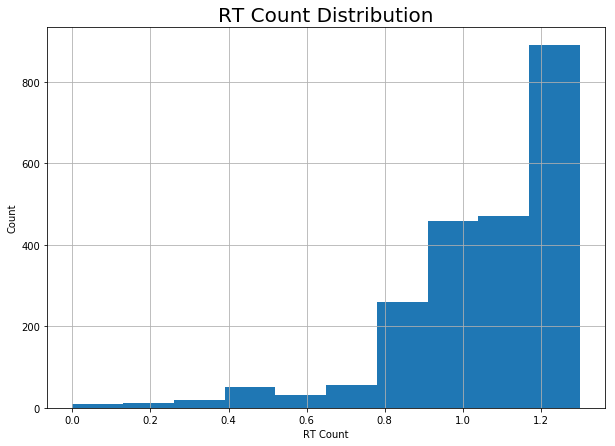

In [13]:
(ntliers['rating_numerator']/ntliers['rating_denominator']).hist(figsize=(10,7));
plt.title("RT Count Distribution", fontsize = 20);
plt.xlabel("RT Count");
plt.ylabel("Count");

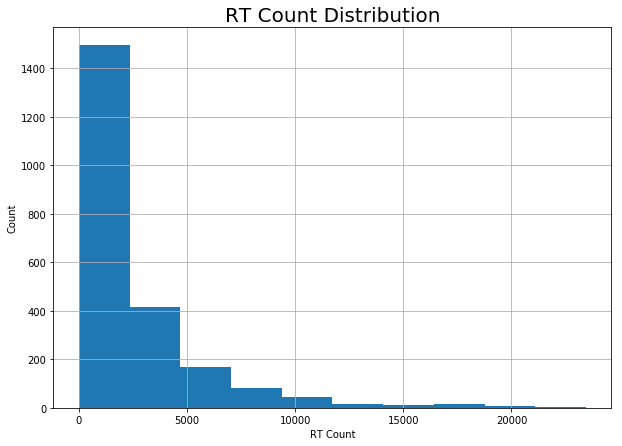

In [14]:
ntliers['retweet_count'].hist(figsize=(10,7));
plt.title("RT Count Distribution", fontsize = 20);
plt.xlabel("RT Count");
plt.ylabel("Count");

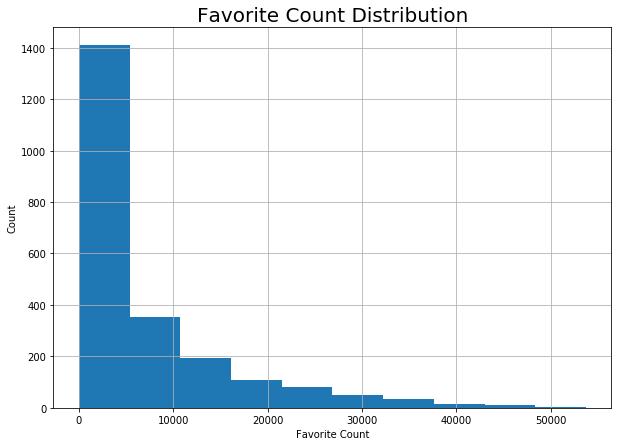

In [15]:
(ntliers['favorite_count']).hist(figsize=(10,7));
plt.title("Favorite Count Distribution", fontsize = 20);
plt.xlabel("Favorite Count");
plt.ylabel("Count");

Given that none of the distributions presented above is normally distributed, **Pearson's coefficient** is not suitable for this data.
**Spearman rank-order correlation coefficient** is going to be used instead

#### Rating vs Fav. Count

In [16]:
stats.spearmanr(ntliers['favorite_count'], ntliers['rating_numerator']/ntliers['rating_denominator'])


SpearmanrResult(correlation=0.41324009526121291, pvalue=6.8279400611399903e-94)

#### Rating vs RT Count

In [17]:
stats.spearmanr(ntliers['retweet_count'], ntliers['rating_numerator']/ntliers['rating_denominator'])


SpearmanrResult(correlation=0.47865326402798686, pvalue=1.0376884799412741e-129)

Both variables have a medium positive correlation with the rating.

Looking at the top 10% quantile by RT&Fav. count, and comparing its rating to the bottom 10% quantile by RT&Fav. count:

#### RT Count more in depth

#### Top 10% by retweet count

In [18]:
q90 = df1_clean.retweet_count.quantile(0.9)

In [19]:
dfq90 = df1_clean[df1_clean.retweet_count>q90]
(dfq90['rating_numerator']/dfq90['rating_denominator']).describe()

count    236.000000
mean       1.401348
std        2.656832
min        0.500000
25%        1.200000
50%        1.300000
75%        1.300000
max       42.000000
dtype: float64

#### Bottom 10% by retweet count

In [20]:
q10 = df1_clean.retweet_count.quantile(0.1)

In [21]:
dfq10 = df1_clean[df1_clean.retweet_count<q10]
(dfq10['rating_numerator']/dfq10['rating_denominator']).describe()

count    236.000000
mean       1.175777
std        2.677798
min        0.100000
25%        0.900000
50%        1.000000
75%        1.100000
max       42.000000
dtype: float64

The top 10% group obtained a median .3 points higher than the bottom 10% group and the average is also higher by more than 0.2

#### Fav Count more in depth

#### Top 10% by retweet count

In [22]:
q90 = df1_clean.favorite_count.quantile(0.9)

In [23]:
dfq90 = df1_clean[df1_clean.favorite_count>q90]
(dfq90['rating_numerator']/dfq90['rating_denominator']).describe()

count    236.000000
mean       1.416179
std        2.656327
min        0.000000
25%        1.200000
50%        1.300000
75%        1.300000
max       42.000000
dtype: float64

#### Bottom 10% by retweet count

In [24]:
q10 = df1_clean.favorite_count.quantile(0.1)

In [25]:
dfq10 = df1_clean[df1_clean.favorite_count<q10]
(dfq10['rating_numerator']/dfq10['rating_denominator']).describe()

count    236.000000
mean       1.137429
std        0.459620
min        0.100000
25%        1.000000
50%        1.100000
75%        1.200000
max        7.500000
dtype: float64

The top 10% group obtained a median .2 points higher than the bottom 10% group and the average is also higher by almos than .3

##### Conclusion

* There is correlation between the RT&Fav count and the ratings provided by the users

<a id='ish2'></a>

### Insight 2
#### Correlation between hour the tweet was posted and the rating

*NOTE: On this section outliers have also been dropped for the reasons previously specified*

Distribution for the time(hour) the tweet was posted

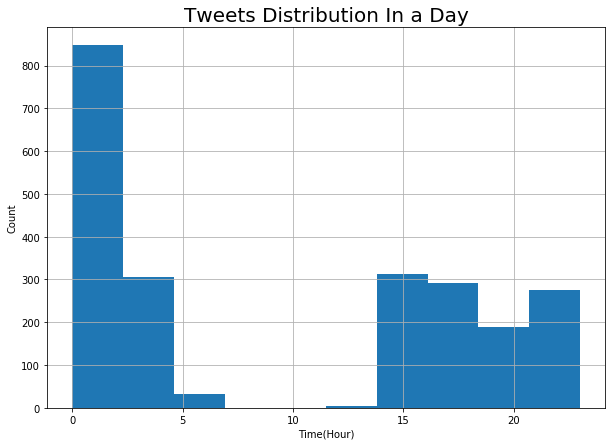

In [26]:
ntliers.timestamp.dt.hour.hist(figsize=(10,7));
plt.title("Tweets Distribution In a Day", fontsize = 20);
plt.xlabel("Time(Hour)");
plt.ylabel("Count");

It is a multimodal distribution. To calculate the correlation it is going to be treated as two separated distributions:

* From 0 to 10
* From 11 to 23

Two dataframes with the corresponding information are created:

**From 0 to 10**

In [27]:
df_bmd = ntliers[ntliers.timestamp.dt.hour<11].copy()

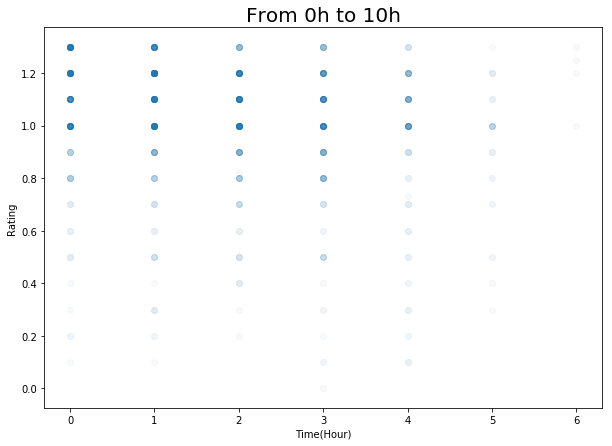

In [28]:
plt.figure(figsize=(10,7))
plt.scatter(df_bmd.timestamp.dt.hour, df_bmd.rating_numerator/df_bmd.rating_denominator, alpha=0.03);
plt.title("From 0h to 10h", fontsize = 20)
plt.xlabel("Time(Hour)");
plt.ylabel("Rating");

**From 11 to 23**

In [29]:
df_amd = ntliers[ntliers.timestamp.dt.hour>=11].copy()

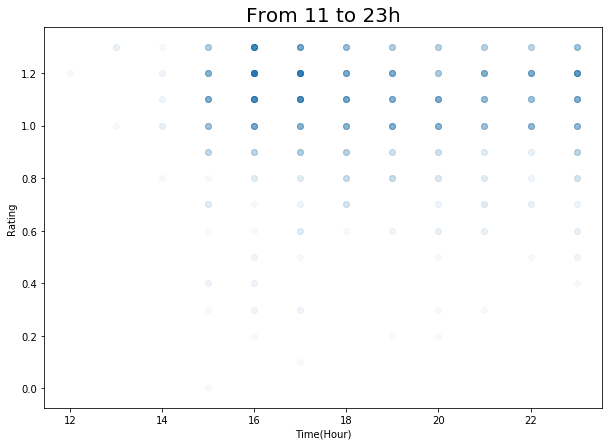

In [30]:
plt.figure(figsize=(10,7))
plt.scatter(df_amd.timestamp.dt.hour, df_amd.rating_numerator/df_amd.rating_denominator, alpha=0.03);
plt.title("From 11 to 23h", fontsize = 20)
plt.xlabel("Time(Hour)");
plt.ylabel("Rating");

Then it can be calculated the correlation for the two groups:

* Before Mid-day

In [31]:
stats.spearmanr(df_bmd['timestamp'].dt.hour, df_bmd['rating_numerator']/df_bmd['rating_denominator'])

SpearmanrResult(correlation=-0.2369775922806508, pvalue=1.3328964204911048e-16)

* After Mid-Day

In [32]:
stats.spearmanr(df_amd['timestamp'].dt.hour, df_amd['rating_numerator']/df_amd['rating_denominator'])

SpearmanrResult(correlation=-0.095549340834822208, pvalue=0.001727923981094167)

##### Conclusions

* From *00h to 10h* there is a negative correlation between the hour and the rating the dog receives. That is to say, the later, the more likely the dog will receive a worse rating in that time frame.

* From *11h to 23h* there is a low but significant negative correlations found between hour and rating.

<a id='ish3'></a>

### Insight 3
#### Most and least popular dog breeds for the weRateDog account

First of, lets get a column with all the dog breeds

In [34]:
df_breed = df1_clean[['rating_numerator','rating_denominator', 'favorite_count','retweet_count']].groupby(by = df1_clean.breed).mean()

In [35]:
df_breed['rating'] = df_breed['rating_numerator']/ df_breed['rating_denominator']

In [36]:
df_breed['ncount'] = df1_clean.groupby(by = df1_clean.breed).agg('count')['tweet_id']

In [37]:
df_breed.reset_index(level=0, inplace= True)

To have results that are more representative, only dog breeds with 15 or more tweets avaialble have been represented.

In [38]:
df_plot = df_breed[df_breed.ncount>=15].sort_values(by = "favorite_count", ascending= False)[['rating', 'favorite_count', 'retweet_count', 'ncount', 'breed']]

In [43]:
df_plot['retweet_count'].mean()

2857.2058653897511

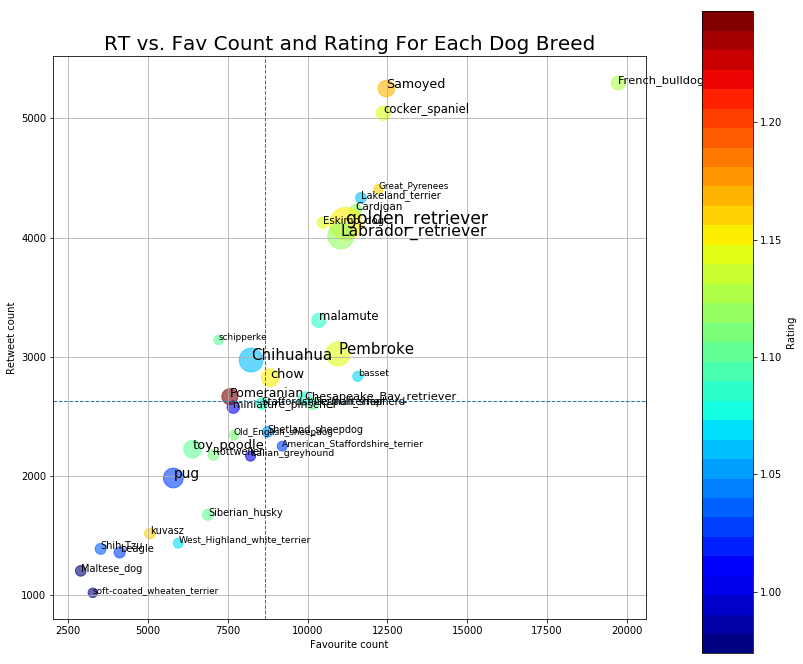

In [56]:
norm = mpl.colors.Normalize(vmin=min(df_plot.rating),vmax=max(df_plot.rating))
fig, ax = plt.subplots()
cmap = plt.get_cmap('jet', 33)
plt.axvline(df_plot['favorite_count'].median(), ls = 'dashed', lw= 1)
plt.axhline(df_plot['retweet_count'].median(), ls = 'dashed', lw= 1)
ax.scatter(df_plot['favorite_count'], df_plot['retweet_count'], c= cmap(norm(df_plot['rating'].values)),  s=df_plot['ncount']*6, alpha=0.6)
ax.grid(True)

plt.title("RT vs. Fav Count and Rating For Each Dog Breed", fontsize=20)
plt.ylabel("Retweet count", )
plt.xlabel("Favourite count")

fig.tight_layout()

fig.set_size_inches(14, 10.5)
for i, text in enumerate(df_plot.breed):
    if(text != ""):
        ax.annotate(text, (df_plot.iloc[i].favorite_count, df_plot.iloc[i].retweet_count), fontsize=3.3*np.log(df_plot.iloc[i].ncount))

ax2  = fig.add_axes([0.85,0.10,0.05,0.85])
cb1  = mpl.colorbar.ColorbarBase(ax2,cmap=cmap,norm=norm,orientation='vertical', label= 'Rating')
plt.show()

##### Classification by Favourite Count
##### Top

In [40]:
df_plot.sort_values(by = "favorite_count", ascending=False)[['favorite_count', 'breed']][:5]

,favorite_count,breed
23,19726.612903,French_bulldog
55,12470.652174,Samoyed
83,12374.787879,cocker_spaniel
28,12217.933333,Great_Pyrenees
38,11674.421053,Lakeland_terrier


##### Bottom

In [41]:
df_plot.sort_values(by = "favorite_count")[['favorite_count', 'breed']][:5]

,favorite_count,breed
41,2898.368421,Maltese_dog
105,3275.400000,soft-coated_wheaten_terrier
59,3521.800000,Shih-Tzu
72,4117.571429,beagle
94,5061.947368,kuvasz


##### Classification by RT Count
##### Top

In [42]:
df_plot.sort_values(by = "retweet_count", ascending=False)[['retweet_count', 'breed']][:5]

,retweet_count,breed
23,5295.580645,French_bulldog
55,5249.934783,Samoyed
83,5042.727273,cocker_spaniel
28,4404.800000,Great_Pyrenees
38,4332.842105,Lakeland_terrier


##### Bottom

In [250]:
df_plot.sort_values(by = "retweet_count")[['retweet_count', 'breed']][:5]

,retweet_count,breed
105,1020.866667,soft-coated_wheaten_terrier
41,1205.105263,Maltese_dog
72,1360.095238,beagle
59,1389.500000,Shih-Tzu
68,1437.437500,West_Highland_white_terrier


##### Classification by Rating
##### Top

In [251]:
df_plot.sort_values(by = "rating", ascending=False)[['rating', 'breed']][:5]

,rating,breed
50,1.247619,Pomeranian
55,1.171739,Samoyed
94,1.163158,kuvasz
28,1.157895,Great_Pyrenees
81,1.154839,chow


##### Bottom

In [252]:
df_plot.sort_values(by = "rating")[['rating', 'breed']][:5]

,rating,breed
41,0.973684,Maltese_dog
105,0.975000,soft-coated_wheaten_terrier
35,1.000000,Italian_greyhound
97,1.007692,miniature_pinscher
72,1.023810,beagle


##### Conclusions

Under the assumptions taken in the analysis above:

* **French buldog** is the breed that gets the most favourite counts and RTs but not the best rating
* Although it lies within the average of RT&Fav. counts, **Pomeranian** breed that gets the best ratings
* In terms of RT&Fav. counts  the **Coated wheaten terrier** and **Maltese** breeds are the least liked
* @dog_rates rate the lowest the **Maltese** breed